# Chapter 6: Beyond Curves: Plane Functions

> Frank A. Farris. "Creating Symmetry"

In [1]:
import functools

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from symmart.colorwheels import (
    hsl_wheel,
    image_wheel,
    raster_wheel,
    wheel_6,
    wheel_gradiant,
    wheel_stepped,
)
from symmart.plane_fns import complex_grid, show_plane_fn, torus, PreimageMask

In [2]:
unit_box = np.array([-1 - 1j, 1 + 1j])

## Visualizing complex functions

### Color wheels

Chapter 6 discusses visualizing plane functions using a "color wheel". The pixels of the image correspond to a grid of complex numbers.

In [3]:
complex_grid(5, 3, limits=(-1 - 2j, 2 + 3j), fix_aspect=True)

array([[-0.75+3.j  ,  0.5 +3.j  ,  1.75+3.j  ],
       [-0.75+1.75j,  0.5 +1.75j,  1.75+1.75j],
       [-0.75+0.5j ,  0.5 +0.5j ,  1.75+0.5j ],
       [-0.75-0.75j,  0.5 -0.75j,  1.75-0.75j],
       [-0.75-2.j  ,  0.5 -2.j  ,  1.75-2.j  ]])

To visualize the complex output we map each complex number to a color using a *color wheel* function. Various smooth and stepped gradiants can be used to emphasize symmetry:

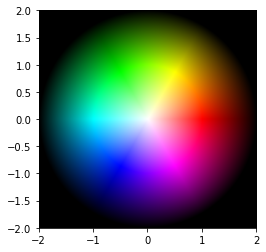

In [4]:
# smooth HSL wheel, disfavored by Farris
show_plane_fn(
    wheel=hsl_wheel,
    limits=2 * unit_box,
)

Figure 6.1a

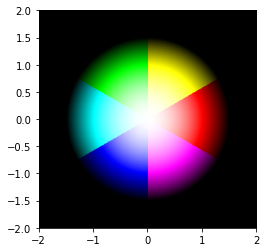

In [5]:
fig = show_plane_fn(
    wheel=wheel_6,
    limits=2 * unit_box,
)
fig

Figure 6.1b

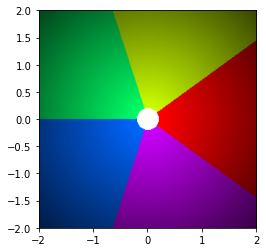

In [6]:
wheel_5 = functools.partial(wheel_gradiant, radius=2, hue_steps=5)
fig = show_plane_fn(
    wheel=wheel_5,
    limits=2 * unit_box,
)
fig

Similar but with a stepped gradiant

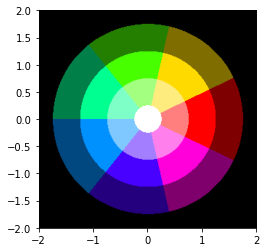

In [7]:
# stepped HSL wheel
wheel_7 = functools.partial(wheel_stepped, hue_steps=7, l_steps=4)
show_plane_fn(
    wheel=wheel_7,
    limits=2 * unit_box,
)

We can also use an image as a color wheel. Map it to some rectangular domain of $\mathbb{C}$ and interpolate between points. We can make values outside the range a default color (black) or else wrap around.

In [8]:
filename = "../images/haertzlisee.jpeg"
alps = np.asarray(Image.open(filename))
alps = alps[:, : alps.shape[0], :]
alps_wheel = raster_wheel(alps, limits=unit_box, background=(45, 118, 116))

Manipulating the limits of the input range allows linear scaling and translating of the interpolated image

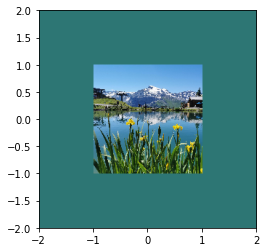

In [9]:
# Points outside the wheel's limits parameter get filled with background color
show_plane_fn(wheel=alps_wheel, limits=(-2 - 2j, 2 + 2j))

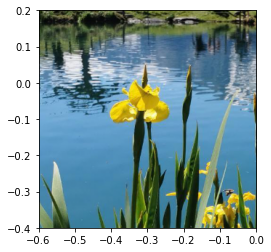

In [10]:
# This crops the range of the complex plane being visualized
show_plane_fn(wheel=alps_wheel, limits=(-0.6 - 0.4j, 0.2j))

### Pre-images

While not discussed by Farris, it can be useful to visualize the domain of a function (eg. to make sure that particular features of an image are included by the plane function). This is accomplished by the `PreimageMask` class demonstrated here.

The example function, $f(z) = \frac{z}{|z|}$, maps all points onto the unit circle. Thus only a circle is considered by the color wheel.

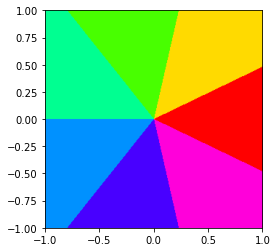

In [11]:
mask = PreimageMask(100, 100, limits=1.5*unit_box)
show_plane_fn(
    lambda z: z/abs(z),
    mask,
    wheel=wheel_7
)

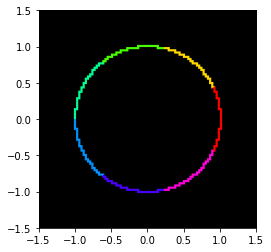

In [12]:
mask.show_wheel(wheel_7)

## Plane functions

Now we add an additional step of mapping $\mathbb{c}\rightarrow \mathbb{c}$ before applying the color wheel.

Here are the functions from figure 6.3:

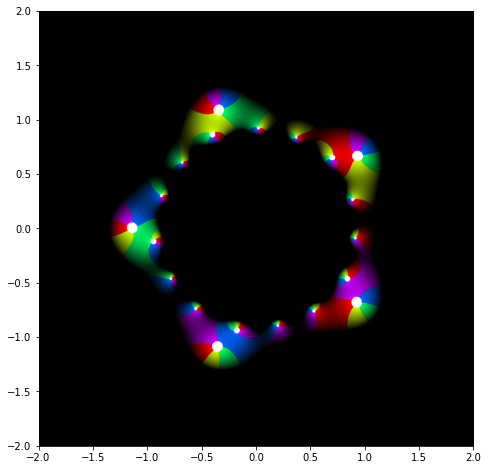

In [13]:
# Figure 6.2a
# Note there are some disparitites from the published figure, eg in the spacing to the outer zeros,
# that do not appear to come from minor differences such as the color wheel. It's likely either I
# or Farris made a typo translating the equation
plt.figure(figsize=(8, 8))


def wheel_5(z):
    "Wheel matching Faris 6.1b. Colors need to be rotated a few degrees to match the boundaries"
    return wheel_gradiant(
        z * np.exp(0.015j * np.pi), radius=1, hue_steps=5, white_radius=0.25
    )


def mystery_holomorphic(z):
    "Function 6.2, f_h(z)"
    return z + z**6 / 2 + 1j * z**-14 / 3


show_plane_fn(
    mystery_holomorphic, wheel=wheel_5, limits=unit_box * 2, width=1000, height=1000
)

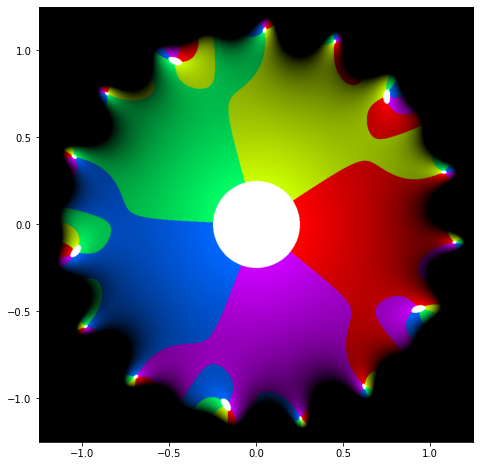

In [14]:
plt.figure(figsize=(8, 8))


def mystery_continuous(z):
    return z + z**6 / 2 + 1j * z.conj() ** 14 / 3


show_plane_fn(
    mystery_continuous,
    wheel=wheel_5,
    limits=unit_box * 1.25,
    width=1000,
    height=1000,
)

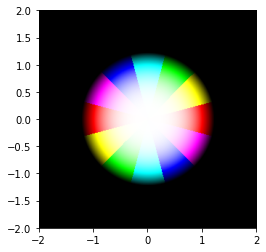

In [15]:
# Figure 6.3a
def zsquared(z):
    return z**2


show_plane_fn(lambda z: z**2, wheel=wheel_6, limits=(-2 - 2j, 2 + 2j))

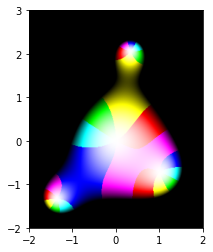

In [16]:
# Figure 6.3b
def quartic(z):
    return z - (1 + 1j) / math.sqrt(8) * z**2 - 1j / 5 * z**4


show_plane_fn(quartic, wheel=wheel_6, limits=(-2 - 2j, 2 + 3j))

CPU times: user 188 ms, sys: 33.4 ms, total: 222 ms
Wall time: 156 ms


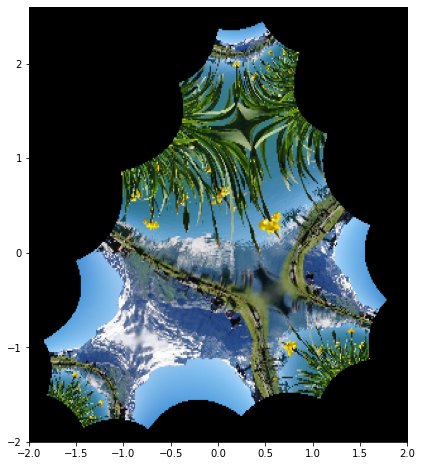

In [17]:
%%time
# Figure 6.4
plt.figure(figsize=(8, 8))

# Using an image for a color wheel
show_plane_fn(
    quartic,
    lambda z: -z,  # Rotate image for asthetics
    wheel=raster_wheel(alps, limits=2 * unit_box),
    limits=(-2 - 2j, 2 + 2.6j),
    outfile="out/06_watercolor_quintic.png",
)